# Imports

In [ ]:
from notebooks import *

INFO     [21:59:23.939] [15627] 151 logging_/<module>: {logging_yaml: None}

In [ ]:
# Import bqq() / %%bqq
#   - HACK Add pydatalab
#       - Use local fork to avoid having to deal with upgrades and porting old patches
sys.path.insert(1, os.path.expanduser('~/hack/pydatalab'))
from potoo.bqq import *
%load_ext potoo.sql_magic

In [ ]:
def var_checkpoint(var_name, env, pkl_path='/tmp/var_checkpoint/%s.pkl'):
    pkl_path = pkl_path % var_name
    if var_name in env:
        print('dump: %(var_name)s -> %(pkl_path)s' % locals())
        joblib.dump(env[var_name], ensure_parent_dir(pkl_path))
    else:
        print('load: %(var_name)s <- %(pkl_path)s' % locals())
        env[var_name] = joblib.load(pkl_path)

def sort_like(xs, ys):
    ys = list(ys)
    return sorted(xs, key=lambda x: ys.index(x) if x in ys else -1)

def sort_like_com_name(xs):
    return sort_like(xs, metadata.species.df.com_name.dtype.categories)

def sort_like_species_group(xs):
    return sort_like(xs, metadata.species.df.species_group.dtype.categories)

species_group_for_com_name = (metadata.species.df
    [['com_name', 'species_group']]
    .set_index('com_name')
    .to_dict()['species_group']
)

# XXX Scratch queries

In [ ]:
bqq('''
    select *
    from ebird.obs_sample_001
    where state_code = 'US-AZ'
    limit 20
''')

Running query...

[2s] cost[cached] rows[20] url[https://console.cloud.google.com/bigquery?project=bubo-1&j=bq:US:job_UTZVSCJGQGmhLMEWavgyr6k9GAPD&page=queryresults]

Fetching results...

[0s]

global_unique_identifier    last_edited_date  taxonomic_order category                common_name  \
0   URN:CornellLabOfOrnithology:EBIRD:OBS154844026 2015-03-11 18:14:56        17828.000  species             Warbling Vireo   
1   URN:CornellLabOfOrnithology:EBIRD:OBS168756555 2015-03-11 18:14:56        30338.005  species         Western Meadowlark   
2   URN:CornellLabOfOrnithology:EBIRD:OBS269503514 2015-03-11 18:14:56        21345.500  species                Cactus Wren   
3   URN:CornellLabOfOrnithology:EBIRD:OBS154543325 2015-03-11 18:14:56        26417.000  species           Crissal Thrasher   
4   URN:CornellLabOfOrnithology:EBIRD:OBS160519046 2015-03-11 18:14:56          400.000     issf                    Mallard   
5   URN:CornellLabOfOrnithology:EBIRD:OBS222877615 2013-12-28 11:48:04         3615.000     form              American Coot   
6   URN:CornellLabOfOrnithology:EBIRD:OBS149127808 2012-04-20 20:55:17         3921.000  species                   Killdeer   
7   URN:CornellLabOfOrnithology:EBIRD:OBS165409690 2013-06-11 18:02:17        20757.000  species      Red-breasted Nuthatch   
8   URN:CornellLabOfOrnithology:EBIRD:OBS170553638 2012-11-22 22:41:02         2989.000  species            Red-tailed Hawk   
9   URN:CornellLabOfOrnithology:EBIRD:OBS149386839 2016-10-03 23:30:07        30866.000  species                House Finch   
10  URN:CornellLabOfOrnithology:EBIRD:OBS172107461 2015-09-17 13:03:44          446.000  species           Northern Pintail   
11  URN:CornellLabOfOrnithology:EBIRD:OBS170094314 2017-08-16 08:58:58         4139.120  species         Greater Yellowlegs   
12  URN:CornellLabOfOrnithology:EBIRD:OBS153727413 2015-09-17 13:23:20        20846.000  species              Brown Creeper   
13  URN:CornellLabOfOrnithology:EBIRD:OBS163457044 2015-09-17 13:24:38        20037.000  species               Barn Swallow   
14  URN:CornellLabOfOrnithology:EBIRD:OBS171666069 2018-01-24 14:40:01        26464.000  species       Northern Mockingbird   
15  URN:CornellLabOfOrnithology:EBIRD:OBS164367157 2015-09-17 12:27:05        29743.000  species     Black-throated Sparrow   
16  URN:CornellLabOfOrnithology:EBIRD:OBS137557075 2015-09-17 12:27:34        29554.000  species           Chipping Sparrow   
17  URN:CornellLabOfOrnithology:EBIRD:OBS370235019 2016-02-01 12:16:26         2118.000  species           Great Blue Heron   
18  URN:CornellLabOfOrnithology:EBIRD:OBS154306381 2018-01-30 22:56:28        30275.000  species      Black-headed Grosbeak   
19  URN:CornellLabOfOrnithology:EBIRD:OBS148896031 2017-08-15 15:52:55         8898.000  species  Black-chinned Hummingbird   

                    scientific_name        subspecies_common_name       subspecies_scientific_name observation_count  \
0                      Vireo gilvus                          None                             None                 4   
1                Sturnella neglecta                          None                             None                17   
2   Campylorhynchus brunneicapillus                          None                             None                 1   
3                Toxostoma crissale                          None                             None                 1   
4                Anas platyrhynchos             Mallard (Mexican)         Anas platyrhynchos diazi                 2   
5                  Fulica americana  American Coot (Red-shielded)  Fulica americana (Red-shielded)                 3   
6              Charadrius vociferus                          None                             None                 2   
7                  Sitta canadensis                          None                             None                 2   
8                 Buteo jamaicensis                          None                             None                 1   
9              Haemorhous mexicanus                          None                             None                 6   
10                       Anas acuta   

In [ ]:
bqq('''
    select
        all_species_reported,
        approved,
        reviewed,
        count(*) as n
    from ebird.obs_sample_001
    group by 1,2,3
    order by n desc
''')

Running query...

[1s] cost[cached] rows[8] url[https://console.cloud.google.com/bigquery?project=bubo-1&j=bq:US:job_KCp50M8vzkB_h262lmXAaS8_vkrt&page=queryresults]

Fetching results...

[0s]

all_species_reported  approved  reviewed       n
0                     1         1         0  454307
1                     0         1         0   40175
2                     1         1         1   11955
3                     0         1         1    2070
4                     1         0         0     233
5                     1         0         1      88
6                     0         0         0      85
7                     0         0         1      23

In [ ]:
bqq('''
    select
        category,
        common_name,
        scientific_name,
        observation_count,
        state_code,
        county_code,
        locality,
        locality_id,
        _locality_type,
        latitude,
        longitude,
        observation_date,
        sampling_event_identifier,
        protocol_type,
        protocol_code,
        all_species_reported,
        approved,
        reviewed
    from ebird.obs_sample_001
    where true
        and state_code = 'US-AZ'
        and all_species_reported = 1 AND approved = 1
    limit 50
''')

Running query...

[1s] cost[cached] rows[50] url[https://console.cloud.google.com/bigquery?project=bubo-1&j=bq:US:job_KDg0-wW5SiDItPy2af6EkGXO3KYg&page=queryresults]

Fetching results...

[1s]

category                common_name                  scientific_name observation_count state_code county_code                                                          locality locality_id _locality_type  latitude  longitude observation_date sampling_event_identifier protocol_type protocol_code  all_species_reported  approved  reviewed
0   species             Warbling Vireo                     Vireo gilvus                 4      US-AZ   US-AZ-003                        San Pedro RNCA--San Pedro House and trails     L129080              H    31.548   -110.141       2012-05-12                 S10875029     Traveling           P22                     1         1         0
1   species         Western Meadowlark               Sturnella neglecta                17      US-AZ   US-AZ-003                        San Pedro RNCA--San Pedro House and trails     L129080              H    31.548   -110.141       2012-11-06                 S11977575     Traveling           P22                     1         1         0
2   species                Cactus Wren  Campylorhynchus brunneicapillus                 1      US-AZ   US-AZ-003                        San Pedro RNCA--San Pedro House and trails     L129080              H    31.548   -110.141       2012-05-18                 S19604846     Traveling           P22                     1         1         0
3   species           Crissal Thrasher               Toxostoma crissale                 1      US-AZ   US-AZ-003                        San Pedro RNCA--San Pedro House and trails     L129080              H    31.548   -110.141       2012-05-27                 S10854525     Traveling           P22                     1         1         0
4      issf                    Mallard               Anas platyrhynchos                 2      US-AZ   US-AZ-003                        San Pedro RNCA--San Pedro House and trails     L129080              H    31.548   -110.141       2012-08-09                 S11313646     Traveling           P22                     1         1         0
5   species                   Killdeer             Charadrius vociferus                 2      US-AZ   US-AZ-003                      Benson--San Pedro Golf Course-patio overlook     L771860              H    31.985   -110.296       2012-04-20                 S10501020    Stationary           P21                     1         1         0
6   species      Red-breasted Nuthatch                 Sitta canadensis                 2      US-AZ   US-AZ-005                                                     Kachina Trail    L1767361              P    35.326   -111.711       2012-10-02                 S11705512     Traveling           P22                     1         1         0
7   species            Red-tailed Hawk                Buteo jamaicensis                 1      US-AZ   US-AZ-013                           Tonto NF--near Eagle Crest neighborhood    L1814474              P    33.497   -111.671       2012-11-18                 S12134398     Traveling           P22                     1         1         0
8   species                House Finch             Haemorhous mexicanus                 6      US-AZ   US-AZ-017                                         Black Mesa - Yazzie Trail    L1506839              P    36.663   -110.282       2012-04-21                 S10516329     Traveling           P22                     1         1         0
9   species           Northern Pintail                       Anas acuta                 7      US-AZ   US-AZ-019                                                   Avra Valley WTP     L211851              H    32.165   -111.179       2012-12-08                 S12252585    Stationary           P21                     1         1         0
10  species         Greater Yellowlegs               Tringa melanoleuca                 1      US-AZ   US-AZ-019                                                   Avra Valley WTP     L211851              H    32.165   -111.179       2012-11-18                 S12

In [ ]:
# Create table: ebird.checklist_species_us_az
bqq('''
    select
        -- category,
        -- common_name,
        -- sampling_event_identifier,
        -- country_code,
        -- state_code,
        -- county_code,
        -- latitude,
        -- longitude
        count(*)
    from ebird.obs_all_expensive
    where true
        and state_code = 'US-AZ'
''')

In [ ]:
bqq('''
    select
        count(*),
        count(distinct sampling_event_identifier),
        count(distinct common_name)
    from ebird.checklist_species_us_az_trip
''').T

Running query...

[1s] cost[cached] rows[1] url[https://console.cloud.google.com/bigquery?project=bubo-1&j=bq:US:job_dpsCA0V0As3E_Tje0KF3GSNJvp7i&page=queryresults]

Fetching results...

[0s]

0
f0_  3670754
f1_   244613
f2_      672

In [ ]:
# Docs: https://ebird.org/science/the-ebird-taxonomy
bqq('''
    select category, count(*)
    from ebird.obs_sample_001
    group by 1
    order by 2 desc
''')

Running query...

[2s] cost[$0.0000, 4.5 MB] rows[8] url[https://console.cloud.google.com/bigquery?project=bubo-1&j=bq:US:job_niL34NOmZ6TzGeYQC-KTkj-rHMhP&page=queryresults]

Fetching results...

[0s]

category     f0_
0     species  487099
1        issf   10937
2    domestic    4150
3        spuh    3270
4        form    1795
5       slash    1380
6      hybrid     269
7  intergrade      36

In [ ]:
# Examples of each category
#   - Docs: https://ebird.org/science/the-ebird-taxonomy
bqq('''
    with xs as (
        select
            *,
            row_number() over (partition by category) as i
        from ebird.obs_sample_001
    )
    select * except (i)
    from xs
    where i <= 3
''')

Running query...

[18s] cost[$0.0009, 203.6 MB] rows[24] url[https://console.cloud.google.com/bigquery?project=bubo-1&j=bq:US:job_1agfGs9bIEFoAyBC-D3OgaZ4ufMP&page=queryresults]

Fetching results...

[1s]

global_unique_identifier    last_edited_date  taxonomic_order    category  \
0   URN:CornellLabOfOrnithology:EBIRD:OBS531697677 2017-09-25 12:17:47          8932.00       slash   
1   URN:CornellLabOfOrnithology:EBIRD:OBS457677716 2018-02-13 11:37:39         31018.02       slash   
2   URN:CornellLabOfOrnithology:EBIRD:OBS192236040 2017-09-08 13:17:37         22228.40       slash   
3   URN:CornellLabOfOrnithology:EBIRD:OBS448745735 2017-11-28 17:44:37          4363.30      hybrid   
4   URN:CornellLabOfOrnithology:EBIRD:OBS271910065 2014-11-18 09:45:08          4363.30      hybrid   
5   URN:CornellLabOfOrnithology:EBIRD:OBS227308019 2018-01-14 00:49:36           406.10      hybrid   
6   URN:CornellLabOfOrnithology:EBIRD:OBS179836258 2013-05-02 17:22:39         27941.50  intergrade   
7   URN:CornellLabOfOrnithology:EBIRD:OBS127701876 2017-06-02 16:30:52         27941.50  intergrade   
8   URN:CornellLabOfOrnithology:EBIRD:OBS258492952 2014-06-06 00:42:05         11319.50  intergrade   
9    URN:CornellLabOfOrnithology:EBIRD:OBS53568472 2014-05-28 19:44:10          4379.00        spuh   
10   URN:CornellLabOfOrnithology:EBIRD:OBS59721896 2016-10-17 20:45:06           539.00        spuh   
11   URN:CornellLabOfOrnithology:EBIRD:OBS66124147 2017-11-28 15:19:06          4078.08        spuh   
12  URN:CornellLabOfOrnithology:EBIRD:OBS561410770 2017-12-29 18:07:27           402.00    domestic   
13  URN:CornellLabOfOrnithology:EBIRD:OBS488810871 2017-04-22 15:26:04          1200.20    domestic   
14  URN:CornellLabOfOrnithology:EBIRD:OBS472933971 2017-03-07 23:42:40          4686.50    domestic   
15  URN:CornellLabOfOrnithology:EBIRD:OBS176215454 2013-01-17 08:55:59          3615.00        form   
16  URN:CornellLabOfOrnithology:EBIRD:OBS175805718 2013-01-09 11:39:22          3615.00        form   
17  URN:CornellLabOfOrnithology:EBIRD:OBS176238740 2017-09-24 12:23:15          9072.00        form   
18  URN:CornellLabOfOrnithology:EBIRD:OBS522319386 2017-07-31 13:19:52         11311.00        issf   
19  URN:CornellLabOfOrnithology:EBIRD:OBS540086049 2018-04-13 14:11:17         11311.00        issf   
20  URN:CornellLabOfOrnithology:EBIRD:OBS453277576 2017-07-13 17:17:00          4329.00        issf   
21  URN:CornellLabOfOrnithology:EBIRD:OBS266619109 2014-11-07 17:26:57         24903.00     species   
22  URN:CornellLabOfOrnithology:EBIRD:OBS256107492 2014-10-30 19:07:57         29554.00     species   
23  URN:CornellLabOfOrnithology:EBIRD:OBS273030579 2014-09-23 11:59:27          2821.00     species   

                                common_name                     scientific_name                       subspecies_common_name  \
0                Rufous/Allen's Hummingbird             Selasphorus rufus/sasin                                         None   
1                      Common/Hoary Redpoll         Acanthis flammea/hornemanni                                         None   
2        Eurasian Reed/African Reed Warbler  Acrocephalus scirpaceus/baeticatus                                         None   
3   Western x Glaucous-winged Gull (hybrid)    Larus occidentalis x glaucescens                                         None   
4   Western x Glaucous-winged Gull (hybrid)    Larus occidentalis x glaucescens                                         None   
5     Mallard x Pacific Black Duck (hybrid)   Anas platyrhynchos x superciliosa                                         None   
6                     Yellow-rumped Warbler                  Setophaga coronata   Yellow-rumped Warbler (Myrtle x Audubon's)   
7                     Yellow-rumped Warbler                  Setophaga coronata   Yellow-rumped Warbler (Myrtle x Audubon's)   
8                          Northern Flicker                    Colaptes auratus                Northern Flicker (intergrade)   
9                                  gull sp.                         Larinae sp.                                         None   
10                               scoter sp

In [ ]:
# Don't need category='domestic'
bqq('''
    select
        common_name,
        category,
        count(*)
    from ebird.obs_sample_001
    where true
        and state_code = 'US-AZ'
        and common_name like '%Mallard%'
    group by 1, 2
    order by 1, 2
    limit 100
''')

Running query...

[1s] cost[$0.0001, 17.1 MB] rows[4] url[https://console.cloud.google.com/bigquery?project=bubo-1&j=bq:US:job_f-VzC9_jomUKASilBl0ybFRSXnXh&page=queryresults]

Fetching results...

[1s]

common_name    category  f0_
0                  Mallard  intergrade    6
1                  Mallard        issf   25
2                  Mallard     species  120
3  Mallard (Domestic type)    domestic    6

In [ ]:
# Do want category in ('form', 'issf', 'intergrade')
bqq('''
    select
        common_name,
        category,
        count(*)
    from ebird.obs_sample_001
    where true
        and common_name in ('American Coot', 'Northern Flicker', 'Yellow-rumped Warbler')
    group by 1, 2
    order by 1, 2
    limit 100
''')

Running query...

[2s] cost[$0.0001, 13.5 MB] rows[8] url[https://console.cloud.google.com/bigquery?project=bubo-1&j=bq:US:job_8Tbje47B7w8BfKOufK3lK7tMlIPP&page=queryresults]

Fetching results...

[1s]

common_name    category   f0_
0          American Coot        form  1633
1          American Coot     species   678
2       Northern Flicker  intergrade    20
3       Northern Flicker        issf  1156
4       Northern Flicker     species  3439
5  Yellow-rumped Warbler  intergrade     5
6  Yellow-rumped Warbler        issf  1371
7  Yellow-rumped Warbler     species  2693

In [ ]:
bqq('''
    select distinct
        category,
        common_name,
        scientific_name,
        subspecies_common_name,
        subspecies_scientific_name
    from ebird.obs_sample_001
    where category = 'domestic'
''')

Running query...

[2s] cost[$0.0001, 24.6 MB] rows[12] url[https://console.cloud.google.com/bigquery?project=bubo-1&j=bq:US:job_5xoG5gCnoeyGZkjPQKiXcTr0doTe&page=queryresults]

Fetching results...

[1s]

category                          common_name                          scientific_name            subspecies_common_name  \
0   domestic                          Rock Pigeon                            Columba livia        Rock Pigeon (Feral Pigeon)   
1   domestic   Domestic goose sp. (Domestic type)                Anser sp. (Domestic type)                              None   
2   domestic              Mallard (Domestic type)       Anas platyrhynchos (Domestic type)                              None   
3   domestic         Muscovy Duck (Domestic type)         Cairina moschata (Domestic type)                              None   
4   domestic           Swan Goose (Domestic type)          Anser cygnoides (Domestic type)                              None   
5   domestic                         Muscovy Duck                         Cairina moschata  Muscovy Duck (Established Feral)   
6   domestic        Graylag Goose (Domestic type)              Anser anser (Domestic type)                              None   
7   domestic       Red Junglefowl (Domestic type)            Gallus gallus (Domestic type)                              None   
8   domestic  Helmeted Guineafowl (Domestic type)         Numida meleagris (Domestic type)                              None   
9   domestic           Budgerigar (Domestic type)  Melopsittacus undulatus (Domestic type)                              None   
10  domestic            Cockatiel (Domestic type)    Nymphicus hollandicus (Domestic type)                              None   
11  domestic       Indian Peafowl (Domestic type)           Pavo cristatus (Domestic type)                              None   

              subspecies_scientific_name  
0           Columba livia (Feral Pigeon)  
1                                   None  
2                                   None  
3                                   None  
4                                   None  
5   Cairina moschata (Established Feral)  
6                                   None  
7                                   None  
8                                   None  
9                                   None  
10                                  None  
11                                  None

In [ ]:
bqq('''
    with good_sp as (
        select *
        from ebird.checklist_species_us_az_trip
        where category not in ('spuh')
    )
    select
        sampling_event_identifier,
        a.common_name as common_name_a,
        b.common_name as common_name_b
    from good_sp a join good_sp b using (sampling_event_identifier)
    order by sampling_event_identifier
    limit 10
''')

Running query...

[4s] cost[$0.0006, 138.9 MB] rows[10] url[https://console.cloud.google.com/bigquery?project=bubo-1&j=bq:US:job_KpNG1JtOTBrb-N8LmwDjlNDoVB5I&page=queryresults]

Fetching results...

[0s]

sampling_event_identifier     common_name_a        common_name_b
0                 S10000271  Ring-necked Duck     Ring-necked Duck
1                 S10000271  Ring-necked Duck     Brewer's Sparrow
2                 S10000271  Ring-necked Duck      American Wigeon
3                 S10000271  Ring-necked Duck    Green-winged Teal
4                 S10000271  Ring-necked Duck     Northern Harrier
5                 S10000271  Ring-necked Duck             Killdeer
6                 S10000271  Ring-necked Duck     Savannah Sparrow
7                 S10000271  Ring-necked Duck    Belted Kingfisher
8                 S10000271  Ring-necked Duck  Green-tailed Towhee
9                 S10000271  Ring-necked Duck     Great Blue Heron

In [ ]:
# Create table: ebird.checklist_species_us_az_trip
bqq('''
    select
        -- *
        count(*)
    from ebird.checklist_species_us_az
    where true
        and latitude  > 31.33   and latitude  < 31.95
        and longitude > -111.00 and longitude > -111.00
''')

Running query...

[2s] cost[$0.0009, 187.8 MB] rows[1] url[https://console.cloud.google.com/bigquery?project=bubo-1&j=bq:US:job_gCm2pxSxn_TS-_fxqtBBzqN7fpQM&page=queryresults]

Fetching results...

[1s]

f0_
0  3395520

In [ ]:
bqq('''
    select count(*)
    from ebird.checklist_species_us_az_trip
''')

Running query...

[1s] cost[$0.0000, 0 Bytes] rows[1] url[https://console.cloud.google.com/bigquery?project=bubo-1&j=bq:US:job_VwCcSQJrFfZ3KcZcVqOBAKiTZiCj&page=queryresults]

Fetching results...

[0s]

f0_
0  3395520

# Load data

In [ ]:
# time[12s + 117s]
good_sp = (bqq(max_rows=None, sql='''
    select
        common_name,
        sampling_event_identifier
    from ebird.checklist_species_us_az_trip
    where category in ('species', 'issf', 'form', 'intergrade')
''')
    .pipe(df_display, lambda df: (df.shape,))
    .pipe(df_display, lambda df: df[:10])
)

Running query...

[10s] cost[$0.0006, 128.8 MB] rows[3347775] url[https://console.cloud.google.com/bigquery?project=bubo-1&j=bq:US:job_wrVUE58u7Kf2V7Dd6ntxMrvI058P&page=queryresults]

Fetching results...

[123s]

(3347775, 2)

common_name sampling_event_identifier
0              Scaled Quail                  S2445280
1       Lucifer Hummingbird                  S6731298
2     Black-chinned Sparrow                  S9116185
3             Cooper's Hawk                  S2590469
4          Harris's Sparrow                 S24916921
5  Brown-crested Flycatcher                  S8830660
6       Rufous-backed Robin                 S13307799
7    Mexican Whip-poor-will                 S13410130
8           Mountain Plover                 S16430716
9          Northern Harrier                 S19496698

In [ ]:
# Throw out noise species
#   - Also make common_name an ordered cat
good_sp_denoise = (good_sp
    .pipe(df_display, lambda df: (df.shape,))
    [lambda df:
        df.common_name.isin(
            (df.assign(n=1).groupby('common_name')['n'].sum() / df.sampling_event_identifier.nunique())
            .reset_index()  # common_name, from groupby
            [lambda s: s.n >= 0.003]  # Like ebird barcharts
            .common_name
        )
    ]
    .pipe(df_display, lambda df: (df.shape,))
)

(3347775, 2)

(3319230, 2)

In [ ]:
# time[14s]
sp_occur = (good_sp_denoise
    .pipe(df_display, lambda df: (df.shape,))
    .assign(n=1)
    .pivot_table(index='sampling_event_identifier', columns='common_name', values='n', aggfunc=np.sum, fill_value=0)
    .pipe(df_display, lambda df: (df.shape,))
    .pipe(df_display, lambda df: df.T[:10].T[:10])
)

In [ ]:
# time[27s]
corr = (sp_occur
    .pipe(df_display, lambda df: (df.shape,))
    .corr()
    .pipe(df_display, lambda df: (df.shape,))
    .pipe(df_display, lambda df: df.T[:10].T[:10])
)

(237077, 258)

(258, 258)

common_name         Abert's Towhee  Acorn Woodpecker  American Avocet  American Coot  American Goldfinch  American Kestrel  \
common_name                                                                                                                  
Abert's Towhee               1.000            -0.100       -1.809e-03          0.145           5.736e-02             0.149   
Acorn Woodpecker            -0.100             1.000       -3.595e-02         -0.149           7.977e-03            -0.093   
American Avocet             -0.002            -0.036        1.000e+00          0.159          -4.997e-04             0.066   
American Coot                0.145            -0.149        1.591e-01          1.000           1.099e-02             0.202   
American Goldfinch           0.057             0.008       -4.997e-04          0.011           1.000e+00             0.019   
American Kestrel             0.149            -0.093        6.562e-02          0.202           1.860e-02             1.000   
American Pipit               0.010            -0.053        5.319e-02          0.254           5.716e-03             0.172   
American Robin              -0.044             0.245       -1.822e-02         -0.057           5.528e-03            -0.051   
American Wigeon              0.048            -0.083        1.016e-01          0.369           8.634e-03             0.192   
Anna's Hummingbird           0.093             0.135       -1.854e-02         -0.024           3.791e-02            -0.006   

common_name         American Pipit  American Robin  American Wigeon  Anna's Hummingbird  
common_name                                                                              
Abert's Towhee               0.010          -0.044            0.048               0.093  
Acorn Woodpecker            -0.053           0.245           -0.083               0.135  
American Avocet              0.053          -0.018            0.102              -0.019  
American Coot                0.254          -0.057            0.369              -0.024  
American Goldfinch           0.006           0.006            0.009               0.038  
American Kestrel             0.172          -0.051            0.192              -0.006  
American Pipit               1.000          -0.022            0.330              -0.018  
American Robin              -0.022           1.000           -0.037              -0.025  
American Wigeon              0.330          -0.037            1.000              -0.018  
Anna's Hummingbird          -0.018          -0.025           -0.018               1.000

In [ ]:
# time[3s]
cov = (sp_occur
    .pipe(df_display, lambda df: (df.shape,))
    .cov()
    .pipe(df_display, lambda df: (df.shape,))
    .pipe(df_display, lambda df: df.T[:10].T[:10])
)

(237077, 258)

(258, 258)

common_name         Abert's Towhee  Acorn Woodpecker  American Avocet  American Coot  American Goldfinch  American Kestrel  \
common_name                                                                                                                  
Abert's Towhee           6.058e-02        -1.037e-02       -2.957e-05      9.498e-03           8.079e-04         1.001e-02   
Acorn Woodpecker        -1.037e-02         1.792e-01       -1.011e-03     -1.671e-02           1.932e-04        -1.069e-02   
American Avocet         -2.957e-05        -1.011e-03        4.409e-03      2.805e-03          -1.899e-06         1.189e-03   
American Coot            9.498e-03        -1.671e-02        2.805e-03      7.052e-02           1.670e-04         1.465e-02   
American Goldfinch       8.079e-04         1.932e-04       -1.899e-06      1.670e-04           3.275e-03         2.905e-04   
American Kestrel         1.001e-02        -1.069e-02        1.189e-03      1.465e-02           2.905e-04         7.448e-02   
American Pipit           2.442e-04        -2.291e-03        3.588e-04      6.839e-03           3.323e-05         4.757e-03   
American Robin          -3.058e-03         2.958e-02       -3.451e-04     -4.301e-03           9.025e-05        -3.994e-03   
American Wigeon          1.837e-03        -5.445e-03        1.040e-03      1.510e-02           7.612e-05         8.071e-03   
Anna's Hummingbird       7.553e-03         1.897e-02       -4.077e-04     -2.134e-03           7.185e-04        -5.019e-04   

common_name         American Pipit  American Robin  American Wigeon  Anna's Hummingbird  
common_name                                                                              
Abert's Towhee           2.442e-04      -3.058e-03        1.837e-03           7.553e-03  
Acorn Woodpecker        -2.291e-03       2.958e-02       -5.445e-03           1.897e-02  
American Avocet          3.588e-04      -3.451e-04        1.040e-03          -4.077e-04  
American Coot            6.839e-03      -4.301e-03        1.510e-02          -2.134e-03  
American Goldfinch       3.323e-05       9.025e-05        7.612e-05           7.185e-04  
American Kestrel         4.757e-03      -3.994e-03        8.071e-03          -5.019e-04  
American Pipit           1.032e-02      -6.406e-04        5.167e-03          -6.198e-04  
American Robin          -6.406e-04       8.137e-02       -1.609e-03          -2.357e-03  
American Wigeon          5.167e-03      -1.609e-03        2.374e-02          -9.076e-04  
Anna's Hummingbird      -6.198e-04      -2.357e-03       -9.076e-04           1.097e-01

# NOTE Checkpoints
- For fast resume in case ipykernel dies

In [ ]:
var_checkpoint('corr', locals())
var_checkpoint('cov', locals())

dump: corr -> /tmp/var_checkpoint/corr.pkl

dump: cov -> /tmp/var_checkpoint/cov.pkl

# Analysis

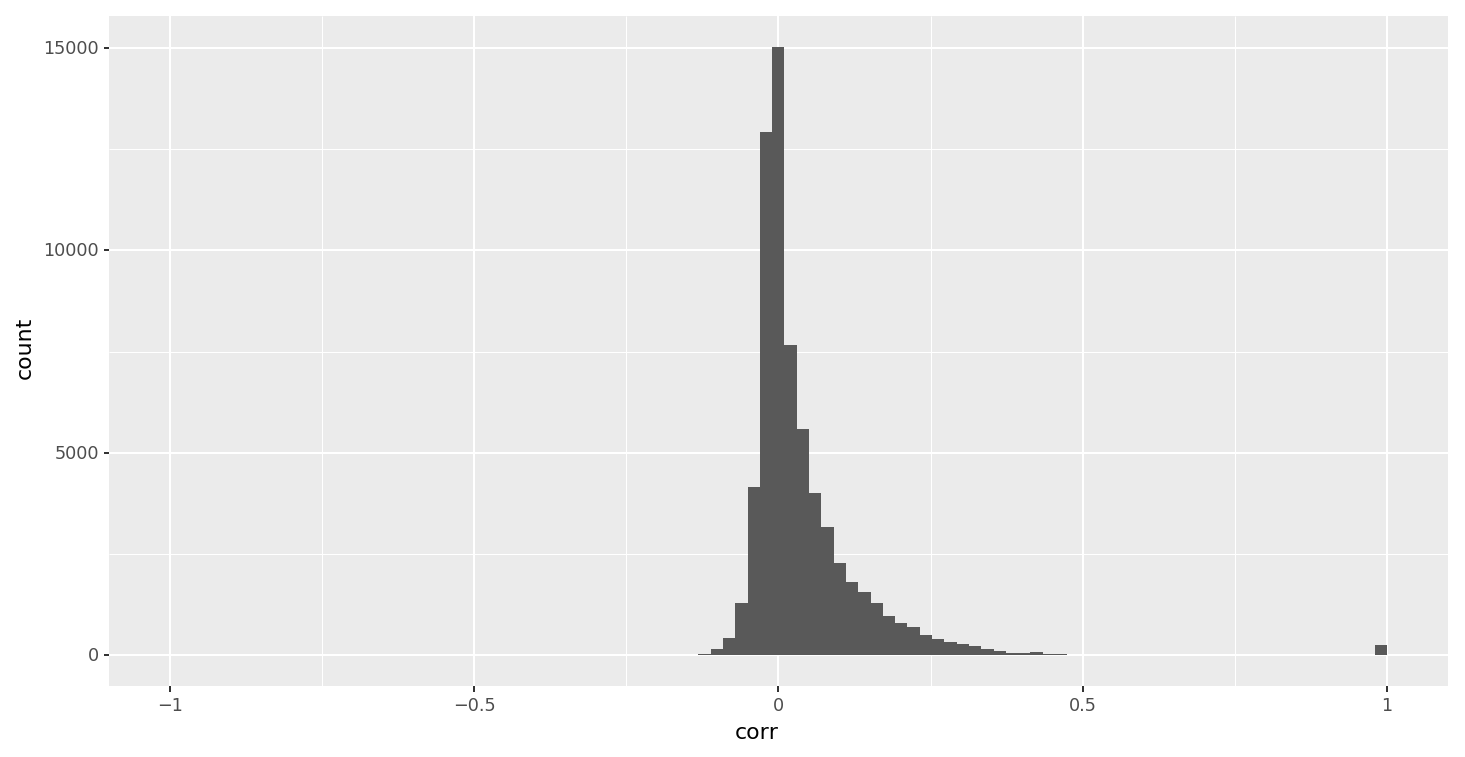

<ggplot: (317857775)>

In [ ]:
(pd.DataFrame(dict(corr=corr.values.ravel()))
    .pipe(ggplot)
    + aes(x='corr')
    + geom_histogram(bins=100)
    # + scale_y_log10()
    + expand_limits(x=[-1, 1])
    + theme_figsize(aspect=.5)
)

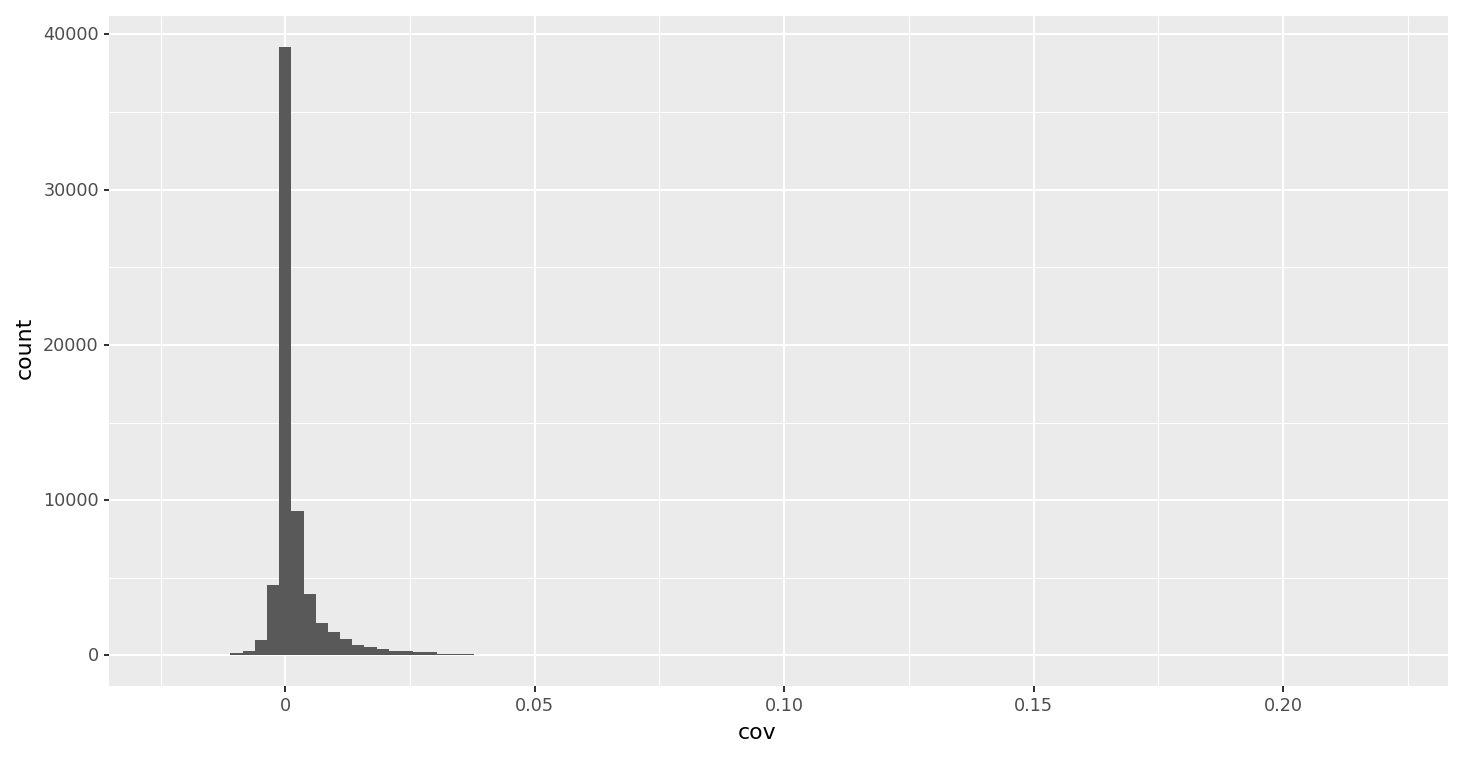

<ggplot: (-9223372036537456110)>

In [ ]:
(pd.DataFrame(dict(cov=cov.values.ravel()))
    .pipe(ggplot)
    + aes(x='cov')
    + geom_histogram(bins=100)
    # + scale_y_log10()
    # + expand_limits(x=[-1, 1])
    + theme_figsize(aspect=.5)
)

(258, 258)

(259, 259)

(67081, 9)

common_name_a                  category
common_name_b                  category
corr                            float64
species_group_a                category
species_group_b                category
common_name_ix_a               category
common_name_ix_b               category
common_name_species_group_a    category
common_name_species_group_b    category
dtype: object

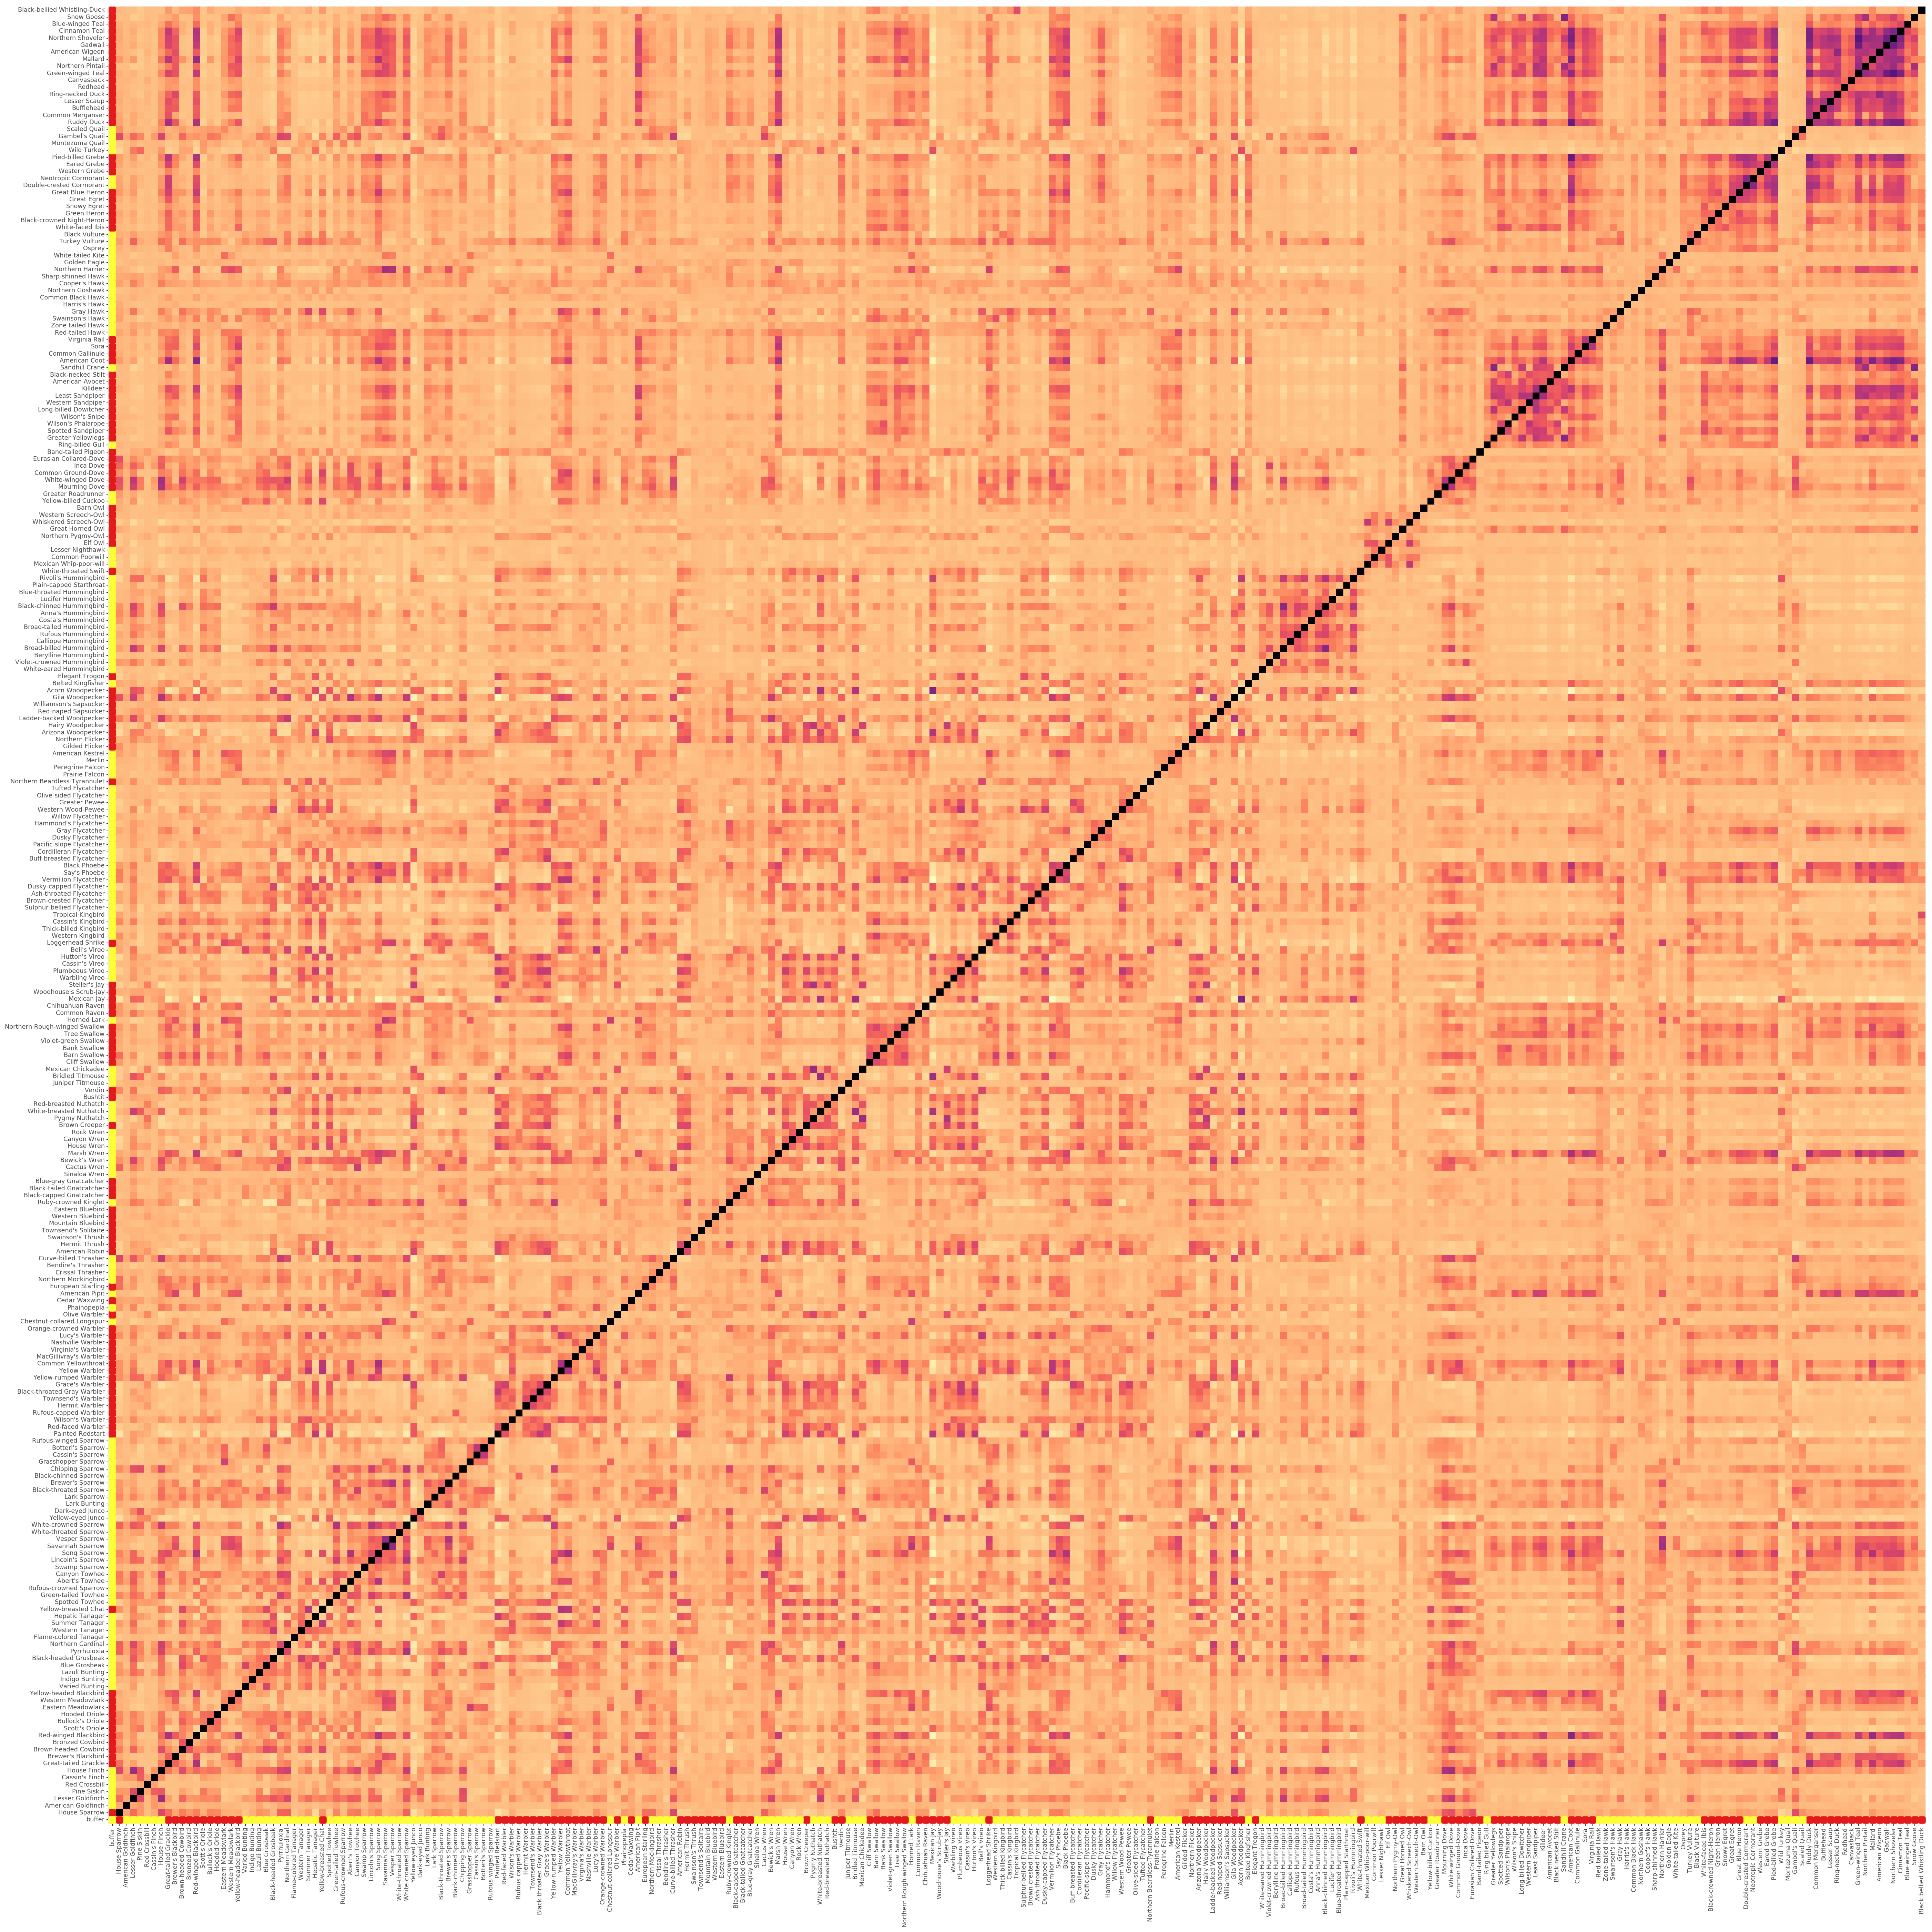

<ggplot: (322294662)>

In [ ]:
# time[26s]
# Corr matrix, ordered by taxo
#   - With species/group labels
#   - Place complex species (higher taxo) toward the bottom/left so they're near the labels
(corr
    # .sample(25, random_state=0).T.sample(25, random_state=0).T  # XXX Dev
    .pipe(df_display, lambda df: (df.shape,))
    # .pipe(df_display, lambda df: df[:10])
    # Add padding row/col to bottom/left
    .assign(buffer=0)
    .T.pipe(df_assign_first, buffer=0).T
    .pipe(df_display, lambda df: (df.shape,))
    # .pipe(df_display, lambda df: df[:10])
    # Melt square (sp,sp) -> tall (sp**2,3)
    .reset_index()
    .rename(columns={'common_name': 'common_name_a'})
    .melt(id_vars='common_name_a', var_name='common_name_b', value_name='corr')
    # Plot
    # .assign(common_name_a=lambda df: df.common_name_a.pipe(lambda s: as_ordered_cat(s, sort_like_com_name(s.unique()))))
    .assign(common_name_a=lambda df: df.common_name_a.pipe(lambda s: as_ordered_cat(s, unique_everseen(['buffer'] + list(reversed(sort_like_com_name(s.unique())))))))
    .assign(common_name_b=lambda df: df.common_name_b.pipe(lambda s: as_ordered_cat(s, unique_everseen(['buffer'] + list(reversed(sort_like_com_name(s.unique())))))))
    .assign(species_group_a=lambda df: df.common_name_a.map(lambda x: species_group_for_com_name.get(x, 'unknown')))
    .assign(species_group_b=lambda df: df.common_name_b.map(lambda x: species_group_for_com_name.get(x, 'unknown')))
    .assign(species_group_a=lambda df: df.species_group_a.pipe(lambda s: as_ordered_cat(s, reversed(sort_like_species_group(s.unique())))))
    .assign(species_group_b=lambda df: df.species_group_b.pipe(lambda s: as_ordered_cat(s, reversed(sort_like_species_group(s.unique())))))
    .assign(common_name_ix_a=lambda df: df.common_name_a.map(df.common_name_a.dtype.categories.tolist().index))
    .assign(common_name_ix_b=lambda df: df.common_name_b.map(df.common_name_b.dtype.categories.tolist().index))
    .assign(common_name_species_group_a=lambda df: df.common_name_a.map(lambda x: '' if x == 'buffer' else '%s — %s' % (x, species_group_for_com_name.get(x, 'unknown'))))
    .assign(common_name_species_group_b=lambda df: df.common_name_b.map(lambda x: '' if x == 'buffer' else '%s — %s' % (x, species_group_for_com_name.get(x, 'unknown'))))
    .pipe(df_display, lambda df: (df.shape,))
    # .pipe(df_display, lambda df: df[:10])
    .pipe(lambda df: df
        .pipe(ggplot)
        # + aes(x='common_name_species_group_a', y='common_name_species_group_b', fill='corr')  # Too noisy, too hard to read common_name
        + aes(x='common_name_a', y='common_name_b', fill='corr')
        + geom_tile()
        + geom_point(data=df[df.common_name_ix_a == 0], mapping=aes(color='species_group_b'), shape=',', stroke=3.0, size=.1)
        + geom_point(data=df[df.common_name_ix_b == 0], mapping=aes(color='species_group_a'), shape=',', stroke=3.0, size=.1)
        + guides(fill=False, color=False)
        + scale_fill_cmap('magma_r')
        + scale_color_manual(['#e4191c', '#ffff33'] * 1000)  # [red, yellow] from mpl.cm.Set1
        + theme_figsize(aspect=1, width=12*4/263.0*df.common_name_a.nunique())
        + theme(
            axis_title=element_blank(),
            axis_text_x=element_text(angle=90),
        )
    )
)

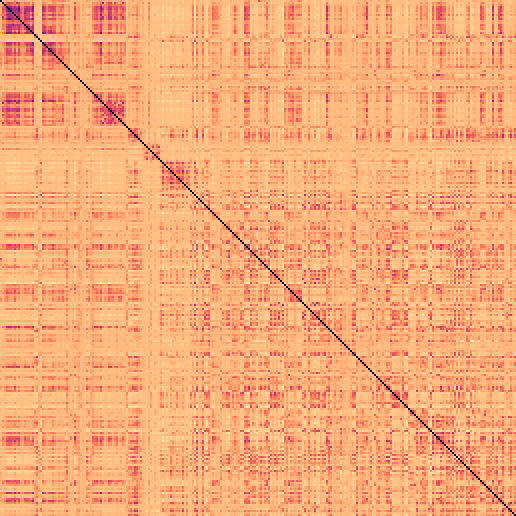

In [ ]:
# Corr matrix, ordered by taxo
#   - NOTE Invalid com_name's appear at the left/top (e.g. hybrid, slash, "domestic type")
show_img(scale=2, X=corr
    .pipe(df_transform_index, lambda s: as_ordered_cat(s, sort_like_com_name(s))).sort_index().T
    .pipe(df_transform_index, lambda s: as_ordered_cat(s, sort_like_com_name(s))).sort_index().T
    .values
)

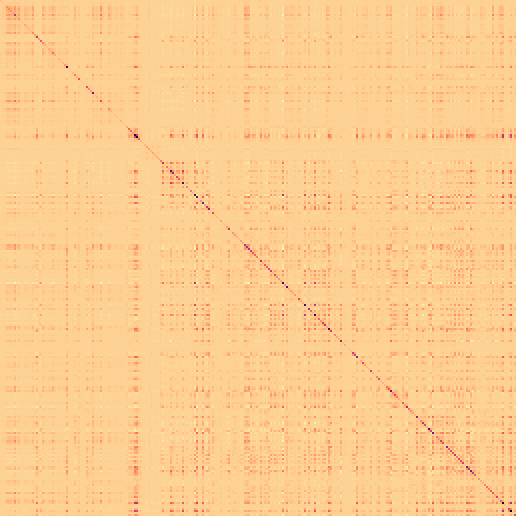

In [ ]:
# Cov matrix, ordered by taxo
#   - NOTE Invalid com_name's appear at the left/top (e.g. hybrid, slash, "domestic type")
show_img(scale=2, X=cov
    .pipe(df_transform_index, lambda s: as_ordered_cat(s, sort_like_com_name(s))).sort_index().T
    .pipe(df_transform_index, lambda s: as_ordered_cat(s, sort_like_com_name(s))).sort_index().T
    .values
)

(258, 258)

(33153,)

(257, 4)

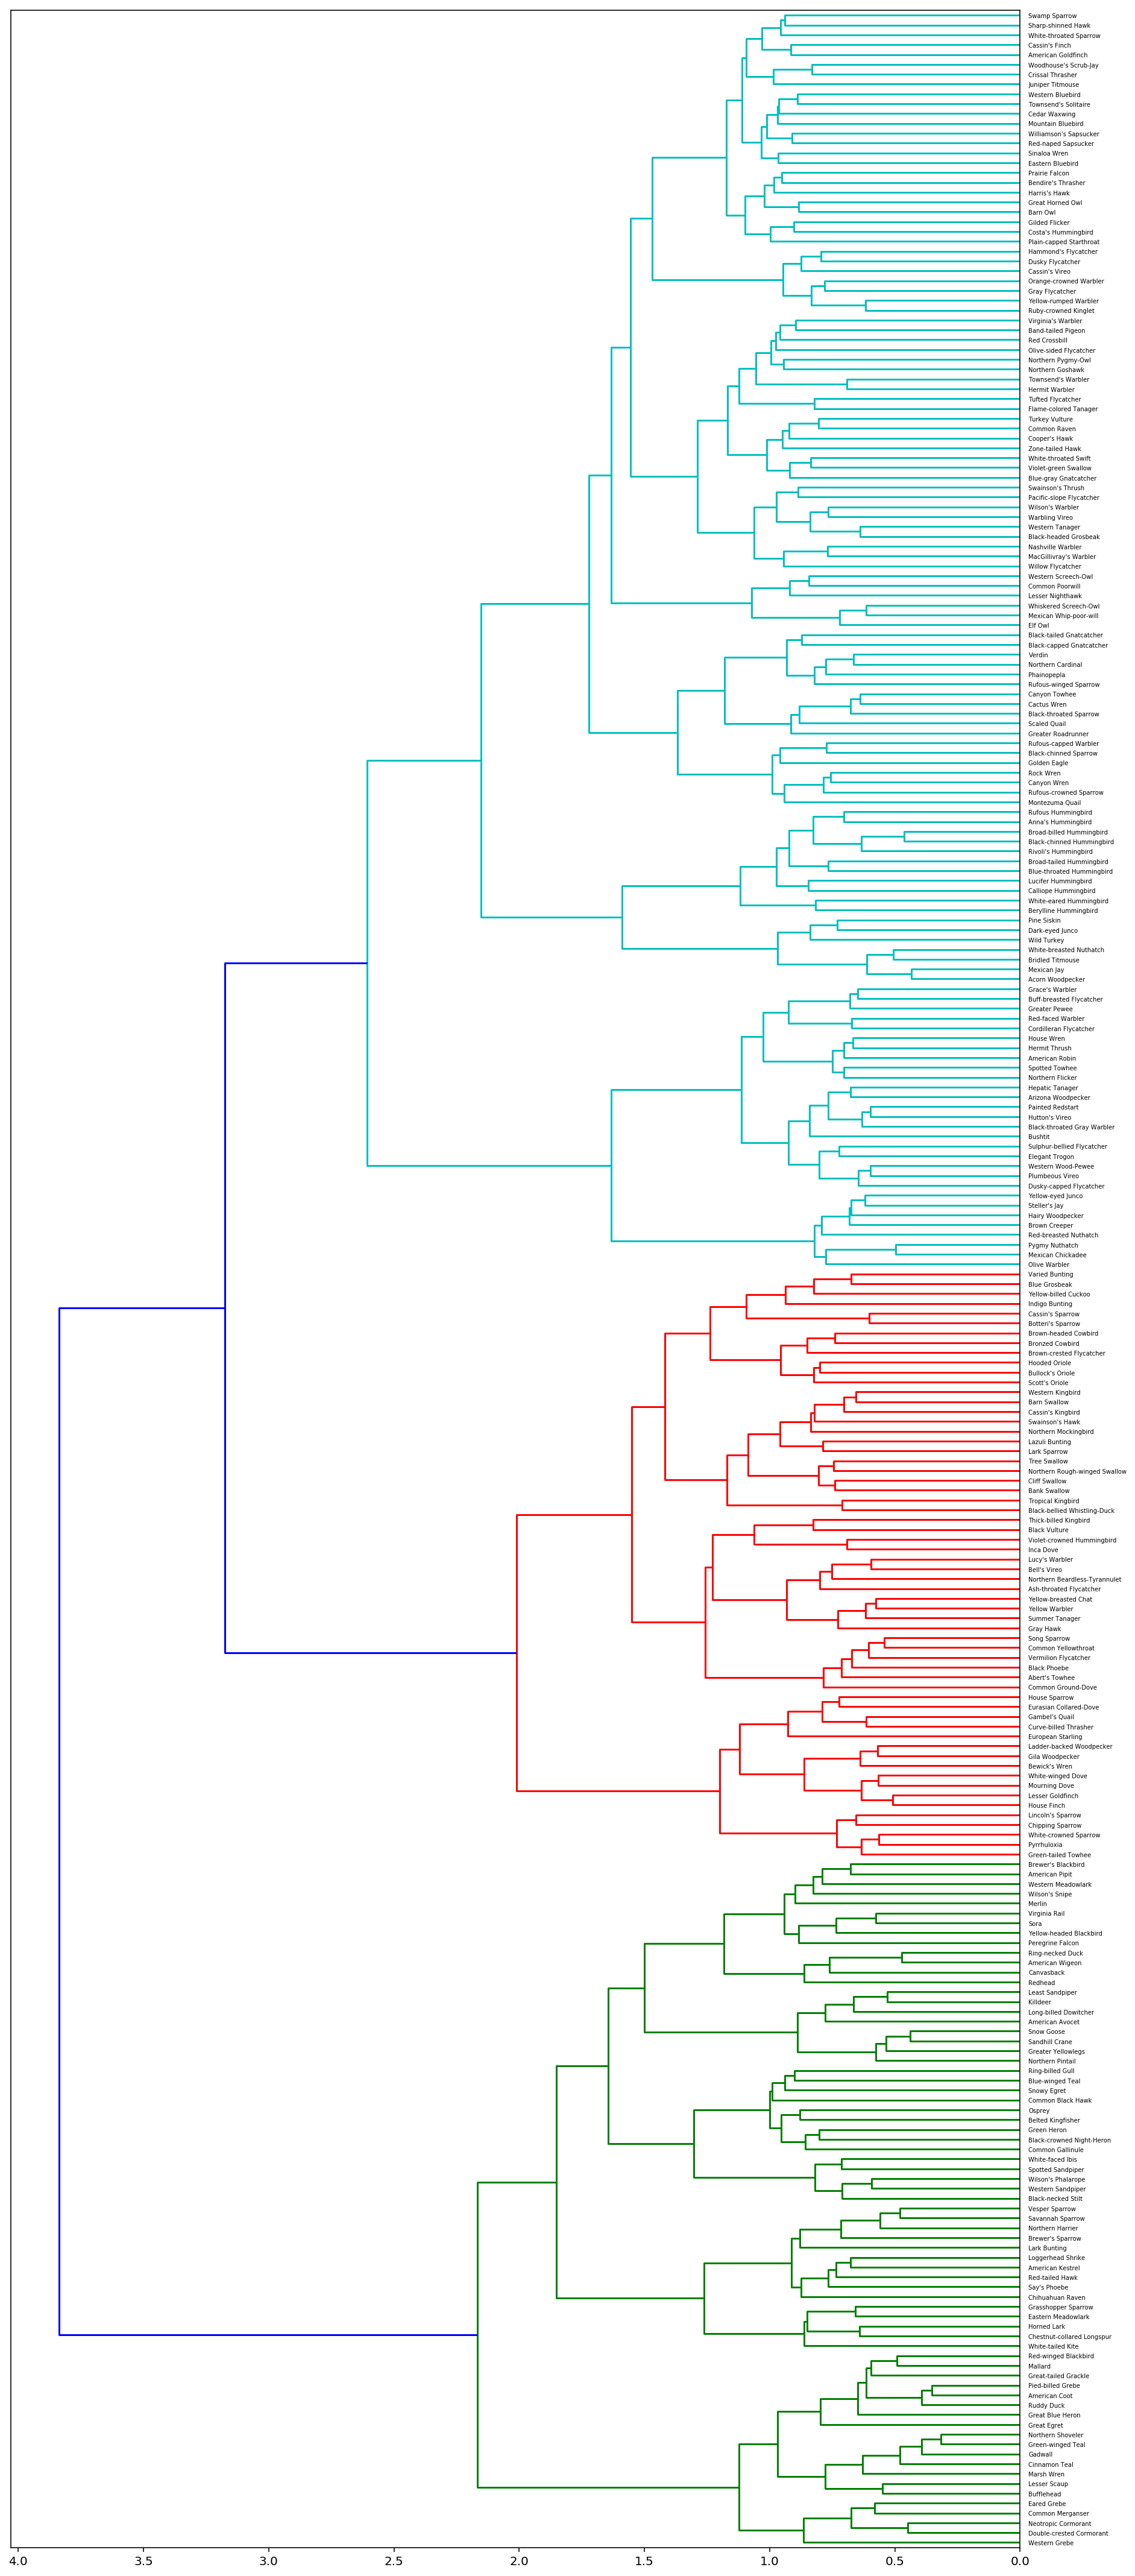

In [ ]:
# time[9s]
# Build dendrogram for agglom clustering
#   - Use scipy i/o sklearn so we can use 'ward'
#   - Mimic https://stackoverflow.com/a/34179197/397334
#       - https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.squareform.html
#       - https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html
#   - TODO Grok
X = (corr.values
    # .T[:10].T[:10]  # XXX Dev
    # .T[:50].T[:50]  # XXX Dev
    # .T[:100].T[:100]  # XXX Dev
)
display(X.shape)
from scipy.cluster import hierarchy as hc
y = hc.distance.squareform(1 - X)
display(y.shape)
Z = hc.linkage(y,
    method='ward',  # Looks great! [TODO Grok how it works]
    # method='weighted',
    # method='complete',
    # method='average',
)
display(Z.shape)
plt.figure(figsize=(15, 15*(len(X) / 100)))
dendrogram = hc.dendrogram(Z, labels=corr.columns,
    orientation='left',
)
dendrogram_label_order = dendrogram['ivl']
plt.show()

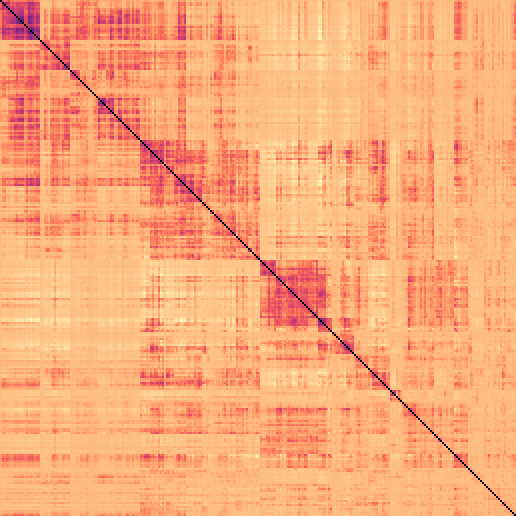

In [ ]:
# Corr matrix, ordered by dendrogram
show_img(scale=2, X=corr
    .pipe(df_transform_index, lambda s: as_ordered_cat(s, dendrogram_label_order)).sort_index().T
    .pipe(df_transform_index, lambda s: as_ordered_cat(s, dendrogram_label_order)).sort_index().T
    .values
)

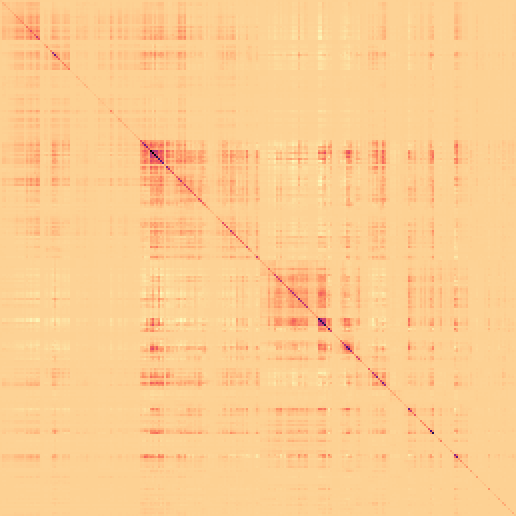

In [ ]:
# Cov matrix, ordered by dendrogram
show_img(scale=2, X=cov
    .pipe(df_transform_index, lambda s: as_ordered_cat(s, dendrogram_label_order)).sort_index().T
    .pipe(df_transform_index, lambda s: as_ordered_cat(s, dendrogram_label_order)).sort_index().T
    .values
)

In [ ]:
# Cluster species by dendrogram
hc_cluster = (
    S(hc.fcluster(Z,
        criterion='maxclust', t=12,  # Prety good -- NOTE Hand tuned
        # criterion='distance', t=1.7,  # Pretty good -- NOTE Hand tuned
        # criterion='inconsistent', t=1.1,  # Not great
    ))
    .pipe(df_display, lambda s: (s.shape,))
    .pipe(df_display, lambda s: s.value_counts()
        .pipe(df_display, lambda s: (s.shape,))
    )
    # .pipe(df_display, lambda s: s[:10])
)
clusters = (corr
    .reset_index()['common_name'].to_frame()
    .assign(common_name=lambda df: df.common_name.pipe(lambda s: as_ordered_cat(s, sort_like_com_name(s))))
    .pipe(df_assign_first, hc_cluster=hc_cluster)
    .sort_values(['hc_cluster', 'common_name'])
    .reset_index(drop=True)  # Drop meaningless ix (from alpha-sorted common_name)
    .pipe(df_display, lambda df: df
        # Show clusters as human-readable table
        .groupby('hc_cluster').apply(lambda df: df.reset_index(drop=True).reset_index())
        .pivot_table(index='index', columns='hc_cluster', values='common_name', aggfunc=np.max, fill_value='')
        .rename_axis(None)
    )
    .pipe(df_display, lambda df: (df.shape,))
    .pipe(df_display, lambda df: df.sample(10, random_state=0).sort_values('hc_cluster'))
)

(258,)

(12,)

12    57
6     43
8     21
4     21
1     20
10    18
9     18
5     17
2     15
3     14
7      8
11     6
dtype: int64

hc_cluster                        1                           2                          3                        4   \
0                      Cinnamon Teal           White-tailed Kite           Blue-winged Teal               Snow Goose   
1                  Northern Shoveler            Northern Harrier                Snowy Egret          American Wigeon   
2                            Gadwall             Red-tailed Hawk                Green Heron         Northern Pintail   
3                            Mallard            American Kestrel  Black-crowned Night-Heron               Canvasback   
4                  Green-winged Teal                Say's Phoebe           White-faced Ibis                  Redhead   
5                       Lesser Scaup           Loggerhead Shrike                     Osprey         Ring-necked Duck   
6                         Bufflehead            Chihuahuan Raven          Common Black Hawk            Virginia Rail   
7                   Common Merganser                 Horned Lark           Common Gallinule                     Sora   
8                         Ruddy Duck  Chestnut-collared Longspur         Black-necked Stilt           Sandhill Crane   
9                  Pied-billed Grebe         Grasshopper Sparrow          Western Sandpiper          American Avocet   
10                       Eared Grebe            Brewer's Sparrow         Wilson's Phalarope                 Killdeer   
11                     Western Grebe                Lark Bunting          Spotted Sandpiper          Least Sandpiper   
12               Neotropic Cormorant              Vesper Sparrow           Ring-billed Gull    Long-billed Dowitcher   
13          Double-crested Cormorant            Savannah Sparrow          Belted Kingfisher           Wilson's Snipe   
14                  Great Blue Heron          Eastern Meadowlark                                  Greater Yellowlegs   
15                       Great Egret                                                                          Merlin   
16                     American Coot                                                                Peregrine Falcon   
17                        Marsh Wren                                                                  American Pipit   
18              Red-winged Blackbird                                                         Yellow-headed Blackbird   
19              Great-tailed Grackle                                                              Western Meadowlark   
20                                                                                                Brewer's Blackbird   
21                                                                                                                     
22                                                                                                                     
23                                                                                                                     
24                                                                                                                     
25                                                                                                                     
26                                                                                                                     
27                                                                                                                     
28                                                                                                                     
29                                                                                                                     
30                                                                                                                     
31                                                                                                                     
32                                      

(258, 2)

hc_cluster               common_name
8             1                Ruddy Duck
111           6            Lucy's Warbler
116           6              Lark Sparrow
122           6            Lazuli Bunting
153           8           Grace's Warbler
144           8  Buff-breasted Flycatcher
194          10         Northern Cardinal
180          10        Greater Roadrunner
225          12            Cassin's Vireo
236          12         Mountain Bluebird

# XXX Appendices

## Try AgglomerativeClustering

5    45
3    43
2    39
1    34
8    31
9    16
6    15
0    15
4    12
7     8
dtype: int64

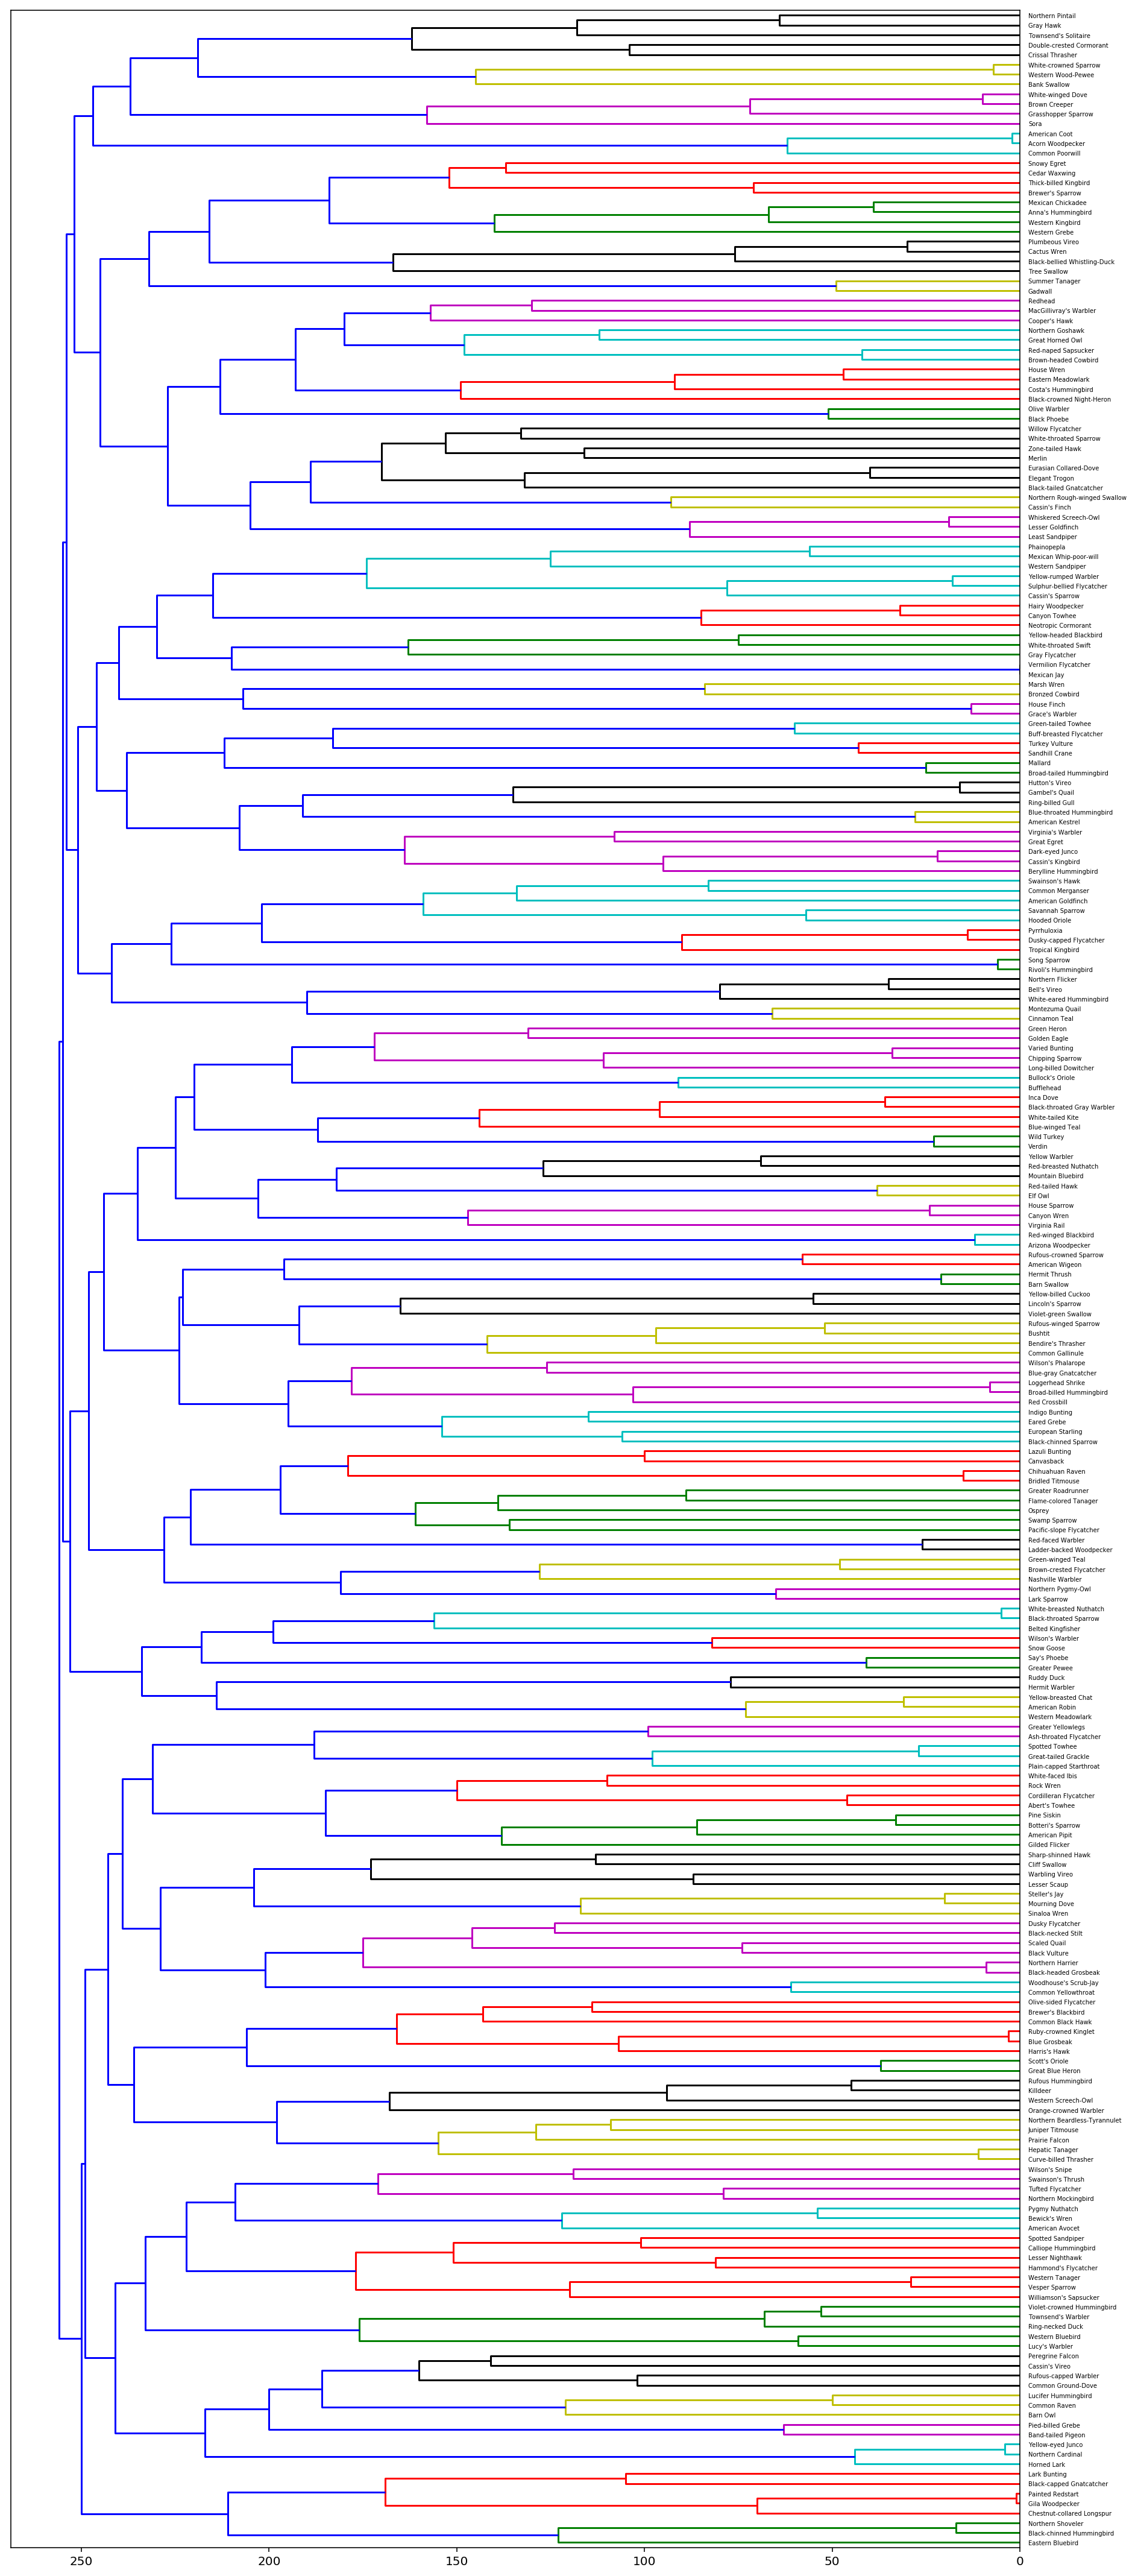

In [ ]:
# XXX
agglom = sk.cluster.AgglomerativeClustering(
    # affinity='precomputed', linkage='average',  # Not so great
    affinity='precomputed', linkage='complete',  # Decent, but less good than 'ward' above
    # affinity='precomputed', linkage='single',  # XXX In future version of sklearn
    # affinity='euclidean', linkage='ward',  # XXX Incorrect
    n_clusters=10,
).fit(corr.values)
display(S(agglom.labels_).value_counts())

def sk_agglom_dendrogram(agglom, **kwargs):
    from scipy.cluster import hierarchy as hc
    children = agglom.children_
    distance = np.arange(children.shape[0])  # Uniform distance between leaves in plot
    n_obs_per_level = np.arange(2, children.shape[0] + 2)
    linkage = np.column_stack([children, distance, n_obs_per_level]).astype(float)
    return hc.dendrogram(linkage, **kwargs)

plt.figure(figsize=(15, 15*(len(corr) / 100)))
_ = sk_agglom_dendrogram(agglom,
    labels=corr.columns,
    orientation='left',
)

## Try dbscan

In [ ]:
display(corr.shape)
X = corr.values
dbscan = sk.cluster.DBSCAN(

    # eps=0.50,  min_samples=5,   # 0/584/584
    # eps=1.00,  min_samples=5,   # 1/575/584
    # eps=1.25,  min_samples=5,   # 7/467/584
    # eps=1.375, min_samples=5,   # 6/316/584
    # eps=1.40,  min_samples=5,   # 10/183/584  <--
    # eps=1.425, min_samples=5,   # 1/15/584
    # eps=1.50,  min_samples=5,   # 1/2/584
    # eps=2.00,  min_samples=5,   # 1/0/584

    # eps=1.25,  min_samples=5,   # 7/467/584
    # eps=1.25,  min_samples=4,   # 11/436/584
    # eps=1.25,  min_samples=3,   # 15/404/584 <--
    # eps=1.25,  min_samples=2,   # 40/354/584
    # eps=1.25,  min_samples=1,   # 394/0/584

    # eps=1.50,  min_samples=50,  # 1/181/584

).fit(X)
display(
    'clusters/noise/total = %s/%s/%s' % (
        pd.Series(dbscan.labels_)[lambda s: s != -1].nunique(),
        (dbscan.labels_ == -1).sum(),
        len(X),
    ),
    'core_sample_indices_:',
    dbscan.core_sample_indices_,
    # 'components_: %s' % (dbscan.components_.shape,),  # Redundant: X[core_sample_indices_]
    'labels:',
    dbscan.labels_,
)

(258, 258)

'clusters/noise/total = 0/258/258'

'core_sample_indices_:'

array([], dtype=int64)

'labels:'

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 

In [ ]:
(corr
    .columns.to_frame('common_name').reset_index(drop=True)
    .assign(label=dbscan.labels_)
    .sort_values(['label', 'common_name'], ascending=False)
    # [:10]
)

common_name  label
257              Zone-tailed Hawk     -1
256         Yellow-rumped Warbler     -1
255       Yellow-headed Blackbird     -1
254             Yellow-eyed Junco     -1
253          Yellow-breasted Chat     -1
252          Yellow-billed Cuckoo     -1
251                Yellow Warbler     -1
250         Woodhouse's Scrub-Jay     -1
249              Wilson's Warbler     -1
248                Wilson's Snipe     -1
247            Wilson's Phalarope     -1
246             Willow Flycatcher     -1
245        Williamson's Sapsucker     -1
244                   Wild Turkey     -1
243             White-winged Dove     -1
242          White-throated Swift     -1
241        White-throated Sparrow     -1
240             White-tailed Kite     -1
239              White-faced Ibis     -1
238       White-eared Hummingbird     -1
237         White-crowned Sparrow     -1
236       White-breasted Nuthatch     -1
235         Whiskered Screech-Owl     -1
234            Western Wood-Pewee     -1
233               Western Tanager     -1
232           Western Screech-Owl     -1
231             Western Sandpiper     -1
230            Western Meadowlark     -1
229              Western Kingbird     -1
228                 Western Grebe     -1
227              Western Bluebird     -1
226                Warbling Vireo     -1
225            Virginia's Warbler     -1
224                 Virginia Rail     -1
..                            ...    ...
33                  Blue Grosbeak     -1
32         Black-throated Sparrow     -1
31    Black-throated Gray Warbler     -1
30       Black-tailed Gnatcatcher     -1
29             Black-necked Stilt     -1
28          Black-headed Grosbeak     -1
27      Black-crowned Night-Heron     -1
26          Black-chinned Sparrow     -1
25      Black-chinned Hummingbird     -1
24       Black-capped Gnatcatcher     -1
23   Black-bellied Whistling-Duck     -1
22                  Black Vulture     -1
21                   Black Phoebe     -1
20                  Bewick's Wren     -1
19          Berylline Hummingbird     -1
18             Bendire's Thrasher     -1
17              Belted Kingfisher     -1
16                   Bell's Vireo     -1
15                   Barn Swallow     -1
14                       Barn Owl     -1
13                   Bank Swallow     -1
12             Band-tailed Pigeon     -1
11        Ash-throated Flycatcher     -1
10             Arizona Woodpecker     -1
9              Anna's Hummingbird     -1
8                 American Wigeon     -1
7                  American Robin     -1
6                  American Pipit     -1
5                American Kestrel     -1
4              American Goldfinch     -1
3                   American Coot     -1
2                 American Avocet     -1
1                Acorn Woodpecker     -1
0                  Abert's Towhee     -1

[258 rows x 2 columns]